# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

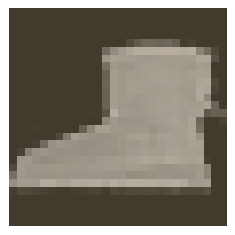

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [3]:
# TODO: Define your network architecture here
from torch import nn, optim

In [4]:
# First, a model has to be defined and stored in memory (i.e. assigned to a variable)
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [5]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

The optimizer should know WHAT to optimize, and HOW FAST to optimize (learning rate).

## My process
Before writing the training loop, I wanted to make sure I understand how to implement each of its parts in isolation.

torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])


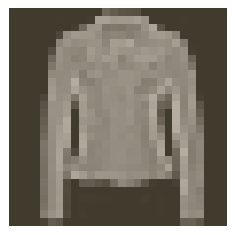

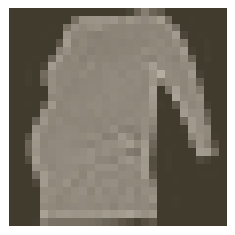

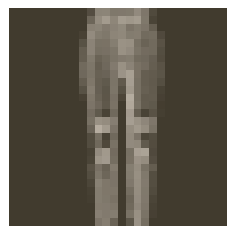

In [6]:
# Demonstrate how a loop goes through images in dataset
counter = 0
for images, labels in iter(trainloader):
    if counter > 2:
        break
    print(images.shape)
    helper.imshow(images[0,:])
    counter = counter + 1


Conclusions:  
• `image` is a batch of 64 images  
• `image[0,:]` picks out the first image from a batch  
• each of the images has a shape `torch.Size([1, 28, 28])`

In [7]:
# Figure out how to flatten each image in the batch in one go
images, labels = next(iter(trainloader))
batch_reshaped = images.view(image.shape[0], -1)

# Check that one image in batch is a 1D vector of length 784
assert (list(batch_reshaped[0,:].shape)) == [784]

Worth remembering:  
the required input to a feed-forward net is a 1D vector or a 2D array of such vectors (a batch / minibatch).

In [8]:
# Figure out how to do one forward step
images, labels = next(iter(trainloader))
print(labels.shape)
x = images.view(image.shape[0], -1)
output = model(x)
print(output.shape)

# Figure out how to do one backward step
# 1) Pass model and labels into loss operation
loss = criterion(output, labels)

# 2) Clean gradients from previous step
optimizer.zero_grad()

# 3) Calculate gradients
loss.backward()

# 4) Update weights
optimizer.step()

torch.Size([64])
torch.Size([64, 10])


In [9]:
# TODO: Train the network here
for images, labels in trainloader:
    x = images.view(images.shape[0], -1)
    output = model(x)
    loss = criterion(output, labels)
    print(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

tensor(2.1926, grad_fn=<NllLossBackward>)
tensor(2.1301, grad_fn=<NllLossBackward>)
tensor(2.0254, grad_fn=<NllLossBackward>)
tensor(1.9753, grad_fn=<NllLossBackward>)
tensor(1.8239, grad_fn=<NllLossBackward>)
tensor(1.7608, grad_fn=<NllLossBackward>)
tensor(1.5357, grad_fn=<NllLossBackward>)
tensor(1.5791, grad_fn=<NllLossBackward>)
tensor(1.4759, grad_fn=<NllLossBackward>)
tensor(1.4223, grad_fn=<NllLossBackward>)
tensor(1.4144, grad_fn=<NllLossBackward>)
tensor(1.0634, grad_fn=<NllLossBackward>)
tensor(1.0894, grad_fn=<NllLossBackward>)
tensor(1.0232, grad_fn=<NllLossBackward>)
tensor(1.0791, grad_fn=<NllLossBackward>)
tensor(0.9122, grad_fn=<NllLossBackward>)
tensor(0.8229, grad_fn=<NllLossBackward>)
tensor(0.8170, grad_fn=<NllLossBackward>)
tensor(0.7329, grad_fn=<NllLossBackward>)
tensor(0.8064, grad_fn=<NllLossBackward>)
tensor(1.0391, grad_fn=<NllLossBackward>)
tensor(0.8144, grad_fn=<NllLossBackward>)
tensor(0.9384, grad_fn=<NllLossBackward>)
tensor(0.9587, grad_fn=<NllLossBac

tensor(0.4516, grad_fn=<NllLossBackward>)
tensor(0.4315, grad_fn=<NllLossBackward>)
tensor(0.6396, grad_fn=<NllLossBackward>)
tensor(0.5549, grad_fn=<NllLossBackward>)
tensor(0.5971, grad_fn=<NllLossBackward>)
tensor(0.3909, grad_fn=<NllLossBackward>)
tensor(0.7404, grad_fn=<NllLossBackward>)
tensor(0.6131, grad_fn=<NllLossBackward>)
tensor(0.4229, grad_fn=<NllLossBackward>)
tensor(0.6513, grad_fn=<NllLossBackward>)
tensor(0.4335, grad_fn=<NllLossBackward>)
tensor(0.6356, grad_fn=<NllLossBackward>)
tensor(0.3955, grad_fn=<NllLossBackward>)
tensor(0.4580, grad_fn=<NllLossBackward>)
tensor(0.8257, grad_fn=<NllLossBackward>)
tensor(0.8135, grad_fn=<NllLossBackward>)
tensor(0.8453, grad_fn=<NllLossBackward>)
tensor(0.4955, grad_fn=<NllLossBackward>)
tensor(0.5759, grad_fn=<NllLossBackward>)
tensor(0.6554, grad_fn=<NllLossBackward>)
tensor(0.4016, grad_fn=<NllLossBackward>)
tensor(0.5824, grad_fn=<NllLossBackward>)
tensor(0.4923, grad_fn=<NllLossBackward>)
tensor(0.5580, grad_fn=<NllLossBac

tensor(0.3492, grad_fn=<NllLossBackward>)
tensor(0.4364, grad_fn=<NllLossBackward>)
tensor(0.5293, grad_fn=<NllLossBackward>)
tensor(0.4055, grad_fn=<NllLossBackward>)
tensor(0.4628, grad_fn=<NllLossBackward>)
tensor(0.2402, grad_fn=<NllLossBackward>)
tensor(0.4791, grad_fn=<NllLossBackward>)
tensor(0.5053, grad_fn=<NllLossBackward>)
tensor(0.3089, grad_fn=<NllLossBackward>)
tensor(0.5616, grad_fn=<NllLossBackward>)
tensor(0.4930, grad_fn=<NllLossBackward>)
tensor(0.5206, grad_fn=<NllLossBackward>)
tensor(0.5656, grad_fn=<NllLossBackward>)
tensor(0.4691, grad_fn=<NllLossBackward>)
tensor(0.4253, grad_fn=<NllLossBackward>)
tensor(0.4659, grad_fn=<NllLossBackward>)
tensor(0.4923, grad_fn=<NllLossBackward>)
tensor(0.3434, grad_fn=<NllLossBackward>)
tensor(0.3611, grad_fn=<NllLossBackward>)
tensor(0.4306, grad_fn=<NllLossBackward>)
tensor(0.4294, grad_fn=<NllLossBackward>)
tensor(0.6989, grad_fn=<NllLossBackward>)
tensor(0.2711, grad_fn=<NllLossBackward>)
tensor(0.4654, grad_fn=<NllLossBac

tensor(0.5601, grad_fn=<NllLossBackward>)
tensor(0.5322, grad_fn=<NllLossBackward>)
tensor(0.3954, grad_fn=<NllLossBackward>)
tensor(0.2217, grad_fn=<NllLossBackward>)
tensor(0.4332, grad_fn=<NllLossBackward>)
tensor(0.5061, grad_fn=<NllLossBackward>)
tensor(0.2122, grad_fn=<NllLossBackward>)
tensor(0.4313, grad_fn=<NllLossBackward>)
tensor(0.6950, grad_fn=<NllLossBackward>)
tensor(0.5606, grad_fn=<NllLossBackward>)
tensor(0.6177, grad_fn=<NllLossBackward>)
tensor(0.4455, grad_fn=<NllLossBackward>)
tensor(0.3677, grad_fn=<NllLossBackward>)
tensor(0.4885, grad_fn=<NllLossBackward>)
tensor(0.2596, grad_fn=<NllLossBackward>)
tensor(0.3186, grad_fn=<NllLossBackward>)
tensor(0.4437, grad_fn=<NllLossBackward>)
tensor(0.3017, grad_fn=<NllLossBackward>)
tensor(0.4832, grad_fn=<NllLossBackward>)
tensor(0.4817, grad_fn=<NllLossBackward>)
tensor(0.4475, grad_fn=<NllLossBackward>)
tensor(0.2611, grad_fn=<NllLossBackward>)
tensor(0.4432, grad_fn=<NllLossBackward>)
tensor(0.4773, grad_fn=<NllLossBac

tensor(0.4990, grad_fn=<NllLossBackward>)
tensor(0.4837, grad_fn=<NllLossBackward>)
tensor(0.3568, grad_fn=<NllLossBackward>)
tensor(0.3379, grad_fn=<NllLossBackward>)
tensor(0.6432, grad_fn=<NllLossBackward>)
tensor(0.4662, grad_fn=<NllLossBackward>)
tensor(0.4800, grad_fn=<NllLossBackward>)
tensor(0.4528, grad_fn=<NllLossBackward>)
tensor(0.4363, grad_fn=<NllLossBackward>)
tensor(0.5409, grad_fn=<NllLossBackward>)
tensor(0.2557, grad_fn=<NllLossBackward>)
tensor(0.1973, grad_fn=<NllLossBackward>)
tensor(0.5917, grad_fn=<NllLossBackward>)
tensor(0.3414, grad_fn=<NllLossBackward>)
tensor(0.4624, grad_fn=<NllLossBackward>)
tensor(0.4192, grad_fn=<NllLossBackward>)
tensor(0.6046, grad_fn=<NllLossBackward>)
tensor(0.1970, grad_fn=<NllLossBackward>)
tensor(0.3621, grad_fn=<NllLossBackward>)
tensor(0.3661, grad_fn=<NllLossBackward>)
tensor(0.4741, grad_fn=<NllLossBackward>)
tensor(0.3603, grad_fn=<NllLossBackward>)
tensor(0.3552, grad_fn=<NllLossBackward>)
tensor(0.2558, grad_fn=<NllLossBac

In [10]:
print("Final loss was: ", loss.item())

Final loss was:  0.34730684757232666


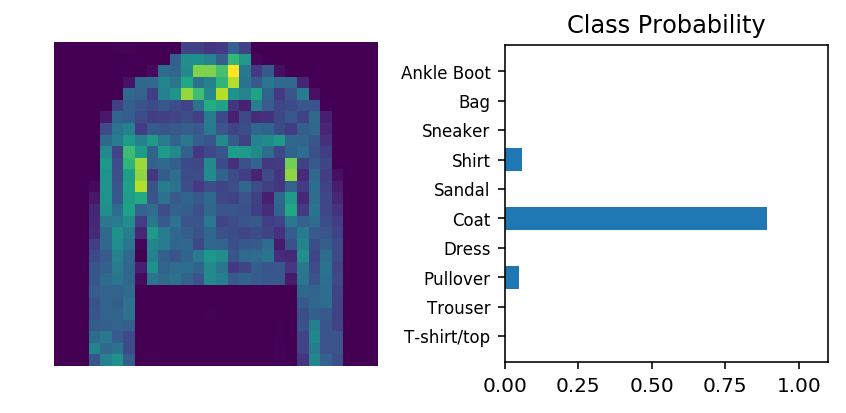

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')